<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Класс

In [13]:
class LinearRegression:
    
    def fit(self,features_train,target_train):
        
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        
        w = (np.linalg.inv(X.T@X))@X.T@y
        
        self.w = w[1:]
        self.w0 = w[0]
    
    def predict(self,new_features):
               
        pred = new_features.values@self.w + self.w0

        return pd.Series(list(pred))

## Загрузка данных

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
df.columns = ['sex','age','salary','fam_members', 'count_of_payments']

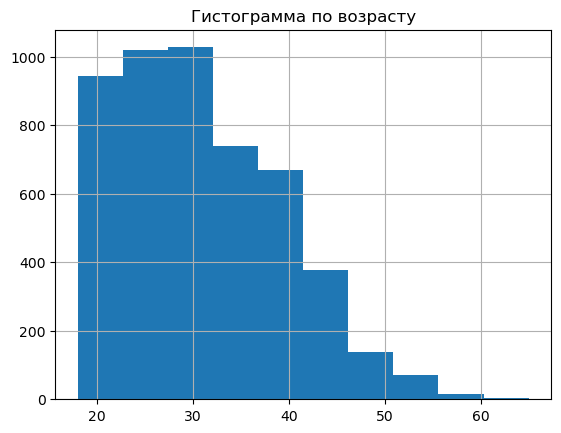

In [40]:
df.age.hist()
plt.title('Гистограмма по возрасту')
plt.show()

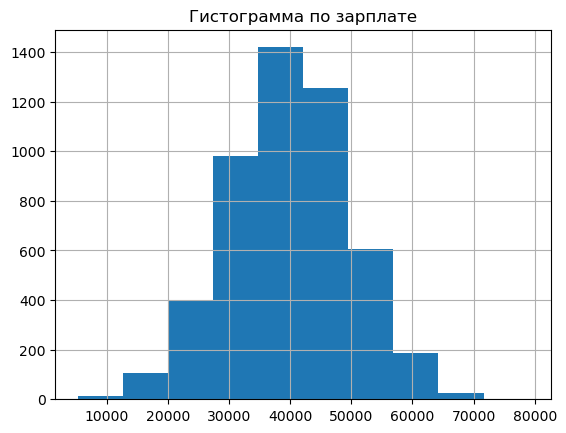

In [41]:
df.salary.hist()
plt.title('Гистограмма по зарплате')
plt.show()

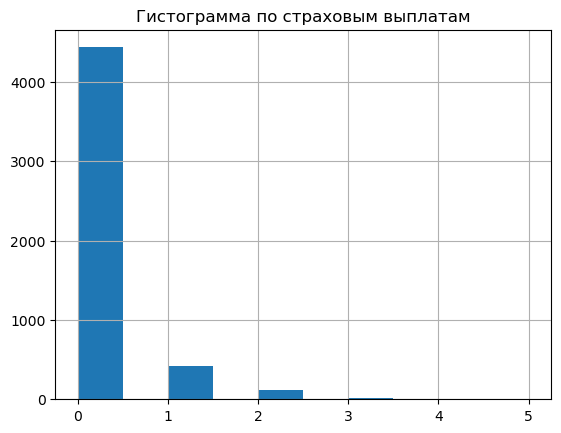

In [12]:
df.count_of_payments.hist()
plt.title('Гистограмма по страховым выплатам')
plt.show()

___Мы видим что у большинства страховых выплат нет. Максимальное количество страховых выплат: 5___

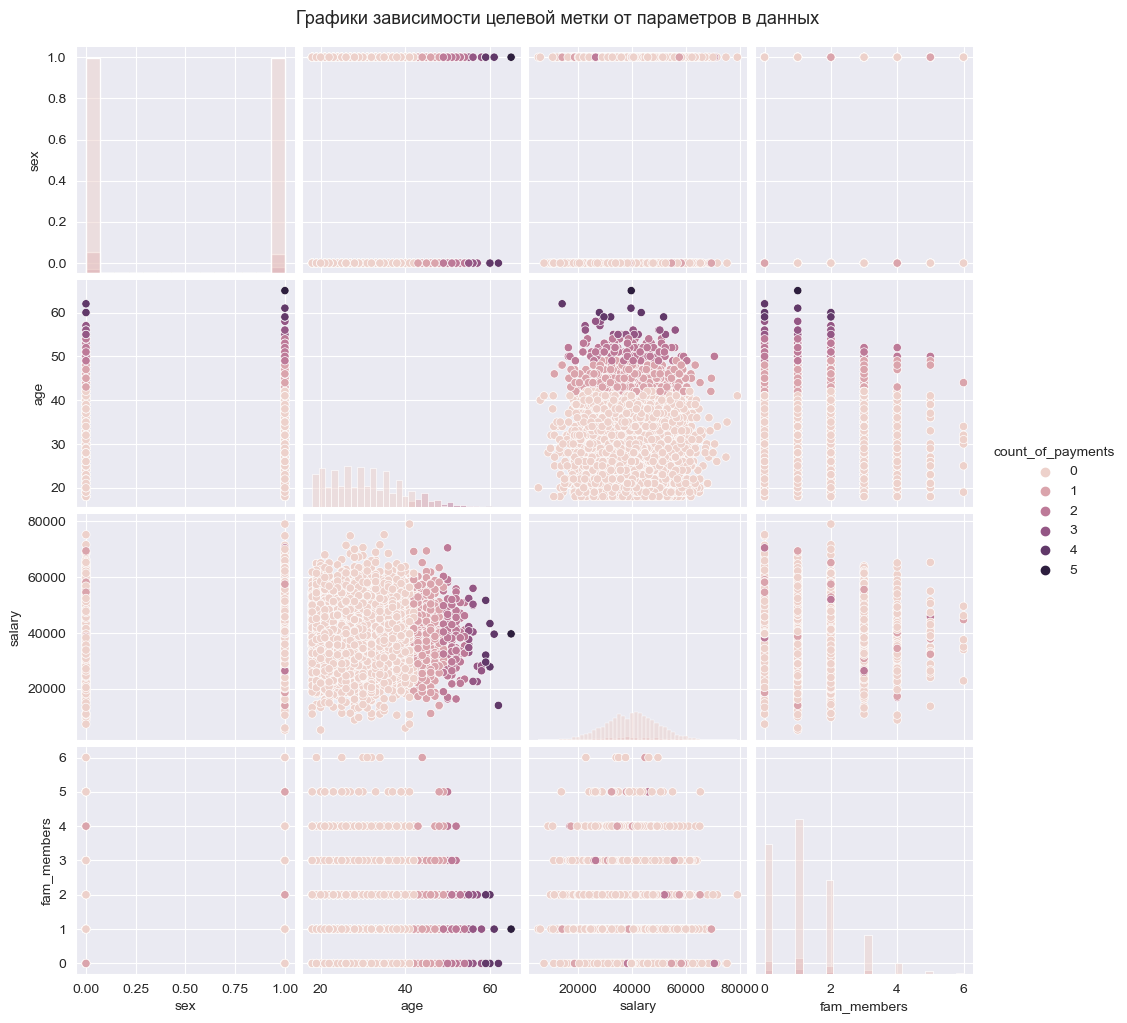

In [114]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='count_of_payments', height=2.5, diag_kind='hist')
plt.suptitle("Графики зависимости целевой метки от параметров в данных", y=1.02, fontsize=13)
plt.show()

## Умножение матриц

___Ответьте на вопрос и обоснуйте решение___

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

___Представим, что у нас есть матрица в которой два признака X1 - рост, Х2 - вес___

In [15]:
X = np.array([[1,2],[3,4]])

___И таргет___

In [25]:
y=np.array([2,2])

In [16]:
X

array([[1, 2],
       [3, 4]])

In [26]:
y

array([2, 2])

___Теперь представим, что у нас есть обратимая матрица А___

In [18]:
A = np.random.normal(size=[2,2])

In [20]:
A

array([[ 0.44897921, -0.56850771],
       [ 0.51591789,  0.80373699]])

In [19]:
np.linalg.inv(A) #проверяем на обратимость

array([[ 1.22864661,  0.86905925],
       [-0.78866691,  0.68633992]])

___Тогда преобразованные признаки будут равны:___

In [23]:
X_new = X@A

In [24]:
X_new

array([[1.48081499, 1.03896627],
       [3.41060919, 1.50942483]])

___Вес в первом случае будет равен:___ 

In [30]:
w = (np.linalg.inv(X.T@X))@X.T@y

In [31]:
w

array([-2.,  2.])

___Во втором:___

In [32]:
w2 = (np.linalg.inv(X_new.T@X_new))@X_new.T@y

In [33]:
w2

array([-0.71917471,  2.95001366])

In [34]:
X@w

array([2., 2.])

In [35]:
X_new@w2

array([2., 2.])

Предсказания получились идентичны. Отсюда мы можем предположить, что умножение на обратимую матрицу не сказывается на качестве предсказаний линейной регрессии

## Алгоритм преобразования

**Алгоритм**

Умножить матрицу признаков на обратимую матрицу, чтобы замаскировать данные

**Обоснование**

Качество предсказаний не поменяется, а по данным невозможно будет узнать реальных цифр

## Проверка алгоритма

In [36]:
df

,sex,age,salary,fam_members,count_of_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [42]:
X = df[['sex','age','salary','fam_members']]
y = df['count_of_payments']

## Разделим данные на тренировочные и тестовые

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Проверяем качество модели с учетом умножения на обратную матрицу

In [93]:
X_train.shape

(4000, 4)

In [94]:
A = np.random.normal(size=[4,4])

In [95]:
try:
    print(np.linalg.inv(A))
except:
    A = np.random.normal(size=[4000,4])

[[-0.03836328 -0.24597539 -0.08869658  0.43233282]
 [ 0.54594477  1.05934597 -1.48619418 -0.43261169]
 [-0.1762865  -1.30149846  2.48669384  0.71210364]
 [ 0.14467342 -0.56514187 -0.00585542  0.10459381]]


In [96]:
X_train_new = X_train@A

In [97]:
X_train_new.shape

(4000, 4)

In [98]:
model1 = LinearRegression()

In [99]:
model1.fit(X_train_new, y_train)

In [100]:
predictions1 = model1.predict(X_test@A)#главное понимать, что признаки которые мы подаем тоже нужно умножать на матрицу

In [102]:
r2_score(y_test,predictions1)

0.43686949377042106

# Проверяем качество модели без учета умножения на обратимую матрицу

In [103]:
model2 = LinearRegression()

In [104]:
model2.fit(X_train, y_train)

In [105]:
predictions2 = model2.predict(X_test)

In [106]:
r2_score(y_test,predictions2)

0.4368694923137997

# Вывод

Перед нами стояла задача зашифровать данные которые подаются в модель, чтобы защитить приватность клиентов. Математически доказали, что умножение признаков на обратимую матрицу подходит в качестве отличного шифратора, при этом никаким образом не делает качество линейной регрессии хуже. 